In [190]:
#!pip install deepface 
#(if you haven't installed, uncomment the line above and run it)
from deepface import DeepFace
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import pandas as pd
import os

# Functions in DeepFace

## **Verify**:
This function is used to compare two face images and determine whether they belong to the same person by calculating the similarity between their embeddings.

In [ ]:
# How do we specify certain thresholds / parameters?

In [10]:
# Load two face images
img1_path = "deepface_tutorial_images/ThomasProfile.jpg"
img2_path = "deepface_tutorial_images/20220607_Steve-Boxall_COS_ZG632_Space-Force_0431.jpg"

In [28]:
# Get the cropped faces
img1faces = DeepFace.extract_faces(img1_path)
img2faces = DeepFace.extract_faces(img2_path)

In [267]:
# Use the verify function to compare the two face images

# Press SHIFT + TAB to view the documentation, and the '+'
# to see all the various parameters. You can specify the model
# (default is VGG Face), pass in a pre-trained model, and adjust the distance metric. Euclidean_L2 
# is apparently the best performing metric.

result = DeepFace.verify(img1_path, img2_path, distance_metric = "euclidean_l2")

# Show the result as a dictionary
result

{'verified': True,
 'distance': 0.7915597760043197,
 'threshold': 0.86,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean_l2',
 'facial_areas': {'img1': {'x': 299, 'y': 162, 'w': 241, 'h': 241},
  'img2': {'x': 2509, 'y': 690, 'w': 224, 'h': 224}},
 'time': 5.58}

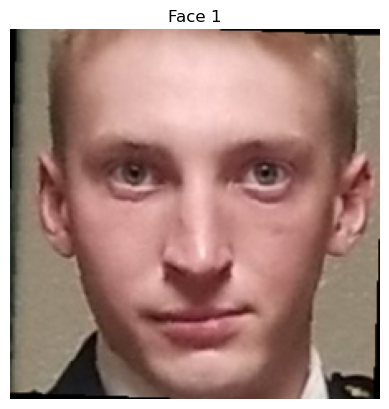

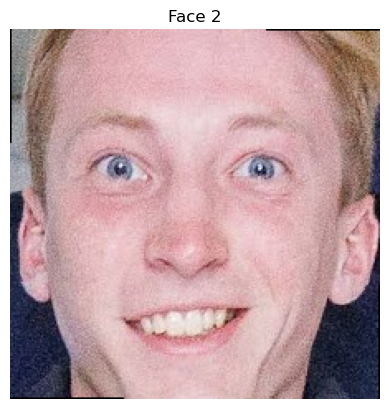

Are the faces the same person? True
Image (Euclidean L2) Similarity: 0.7915597760043197


In [268]:
# Extract the face from the dictionary of cropped faces from the image
face1 = img1faces[0]['face']
face2 = img2faces[0]['face']

# Imshow and print the result
plt.imshow(face1)
plt.title("Face 1")
plt.axis("off")
plt.show()

# Imshow and print the result
plt.imshow(face2)
plt.title("Face 2")
plt.axis("off")
plt.show()

print("Are the faces the same person?", result["verified"])
print("Image (Euclidean L2) Similarity:", result["distance"])

## Extract Faces

Extracts all the faces in an image.

Face  1 

Coordinates: x:  530 y:  353 width:  77 height: 
 94 Confidence:  0.9995222091674805 

Face  2 

Coordinates: x:  760 y:  319 width:  72 height: 
 96 Confidence:  0.9994577765464783 

Face  3 

Coordinates: x:  647 y:  254 width:  72 height: 
 98 Confidence:  0.9994408488273621 

Face  4 

Coordinates: x:  371 y:  273 width:  65 height: 
 107 Confidence:  0.9991965889930725 

Face  5 

Coordinates: x:  72 y:  234 width:  62 height: 
 118 Confidence:  0.999049723148346 

Face  6 

Coordinates: x:  557 y:  259 width:  68 height: 
 80 Confidence:  0.9979998469352722 

Face  7 

Coordinates: x:  844 y:  322 width:  61 height: 
 83 Confidence:  0.994978129863739 



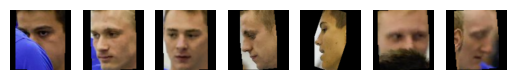

In [286]:
# specify the image to extract
filePath = "deepface_tutorial_images\Random.jpg"

extracted_faces = DeepFace.extract_faces(filePath, detector_backend = "retinaface")

# we can iterate through and print the face data for each, it is returned as a dict. here is an example dict of face extracted
#print("Metadata\n", extracted_faces[0], "\n")

# a face dict contains an array of the face which we can display, a `facial_area` which we can use for bounding boxes
# and a confidence parameter which is how confident that it is a face.

# create a figure to hold the faces
fig, axes = plt.subplots(1, len(extracted_faces))

for i, face in enumerate(extracted_faces):
    # get all the parameters for the face
    faceimg = face['face']
    xcoord = face['facial_area']['x']
    ycoord = face['facial_area']['y']
    width = face['facial_area']['w']
    height = face['facial_area']['h']
    confidence = face['confidence']
    
    # display the face
    axes[i].imshow(faceimg)
    axes[i].set_axis_off()
    
    # specify the face
    print("Face ", i+1, "\n")
    
    # print the parameters
    print("Coordinates: x: ", xcoord, "y: ", ycoord, "width: ", width, "height: \n", height, "Confidence: ", confidence, "\n")
    
plt.show()

# notice that the default `opencv` sucked, it did not pick up on all the faces so I changed it to retinaface

## **Find:**
This function searches for a given face image in a database of face images and returns the most similar faces.

In [132]:
# Choose the face image to search for (path)
target_img_path = "source.png"

In [133]:
# Define a dictionary with image paths as keys and person names as values
db_path = "deepface_tutorial_images"

In [134]:
# Load the actual source image
source_img = cv2.imread("source.png")
source_img = cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB)

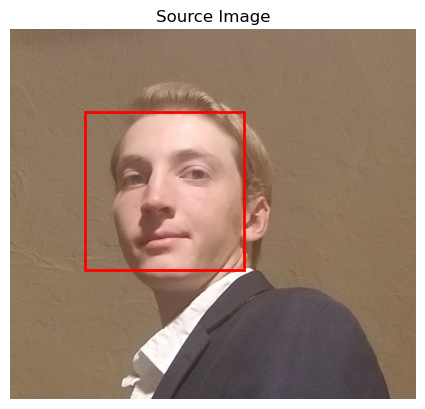

In [135]:
# Plot the source image with a bounding box
fig, ax = plt.subplots(1)
ax.imshow(source_img)
rect = patches.Rectangle((401, 437), 842, 842, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.title("Source Image")
plt.axis("off")
plt.show()

In [171]:
# function to delete files. we need to delete the prior stored representations to change it each time we try a new backend.
def removeFile(file_path):
    # Check if the file exists before attempting to delete it
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"File '{file_path}' has been deleted.")
    else:
        print(f"The file '{file_path}' does not exist.")

In [207]:
# Search for the target face in the database. Set enforce_detection = "False" so that it doesn't just fail. 
# Stores into a pandas LIST, not a dataframe. Must convert to a pandas DATAFRAME

# file path to prior stored pkl data
dataPath = "deepface_tutorial_images/representations_vgg_face.pkl"

# delete the prior stored data first
removeFile(dataPath)

df = DeepFace.find(img_path=target_img_path, db_path=db_path, enforce_detection = "False", distance_metric = "euclidean_l2")

File 'deepface_tutorial_images/representations_vgg_face.pkl' has been deleted.


Finding representations: 100%|███████████████████████████████████████████████████████████| 8/8 [00:16<00:00,  2.04s/it]


Representations stored in deepface_tutorial_images/representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  16.95046830177307  seconds


In [265]:
# Grab and Inspect the dataframe
df[0]

identity  source_x  source_y  \
0         deepface_tutorial_images/ThomasProfile.jpg       401       437   
1      deepface_tutorial_images/GenBrattonAndYou.jpg       401       437   
2  deepface_tutorial_images/GridArt_20220616_1454...       401       437   
3  deepface_tutorial_images/GridArt_20220616_1454...       401       437   
4  deepface_tutorial_images/GridArt_20220616_1454...       401       437   
5  deepface_tutorial_images/20220607_Steve-Boxall...       401       437   

   source_w  source_h  VGG-Face_euclidean_l2  
0       842       842               0.768786  
1       842       842               0.783636  
2       842       842               0.835527  
3       842       842               0.835970  
4       842       842               0.839506  
5       842       842               0.851833

## Display Matches (my custom function)

In [308]:
def displayMatches(dataFrame):
    # This function iterates through the matches, gets all the matched faces, and displays the bounding boxes around the matched faces
    # It takes in `dataFrame` as an input, which is the direct output from the `find` function in DeepFace.
    # It also takes in a specified threshold

    # Extract the actual dataframe (the output is a list in DeepFace)
    df = dataFrame[0]
    
    # Drop the duplicate rows in the database
    df = df.drop_duplicates(subset='identity')
    
    # Print the number of matches found
    print(f"Found {len(df)} matches!\n")
    
    # Loop through the dataframe rows
    for index, row in df.iterrows():
        # Load the matched image
        matched_img = cv2.imread(row['identity'])
        matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

        # Detect the target face's coordinates from the images
        extracted_faces = DeepFace.extract_faces(matched_img, detector_backend='retinaface', enforce_detection=False)

        # Display the matched image with a bounding box
        fig, ax = plt.subplots(1)
        ax.imshow(matched_img)

        face_info = extracted_faces[0]
        
        x = face_info['facial_area']['x']
        y = face_info['facial_area']['y']
        w = face_info['facial_area']['w']
        h = face_info['facial_area']['h']

        print(f"Matched Face Coordinates: x={x}, y={y}, w={w}, h={h}")

        # add the bounding box
        rect = patches.Rectangle(xy = (x, y), width=w, height=h, linewidth=0.5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        plt.title(f"Matched Image (Euclidean L2: {row[5]:.5f})")
        plt.axis("off")
        plt.show()

## Embeddings

Get the embeddings of an image.

In [271]:
target_face_img_path = "source.png"
target_face_img = cv2.imread(target_face_img_path)
target_face_img = cv2.cvtColor(target_face_img, cv2.COLOR_BGR2RGB)
target_face_embeddings = DeepFace.represent(target_face_img, model_name='VGG-Face', detector_backend='retinaface')

# extract the actual embedding from the dict (which returns both the embedding and the face coords)
target_face_embeddings = target_face_embeddings[0]["embedding"]

# We can calculate the Euclidean distance
extracted_face_img = face_info['face']

extracted_face_embeddings = DeepFace.represent(extracted_face_img, model_name='VGG-Face', detector_backend='retinaface', enforce_detection = False)
# get the actual embeddings from the returned dict
extracted_face_embeddings = extracted_face_embeddings[0]["embedding"]
euclidean_distance = distance.euclidean(target_face_embeddings, extracted_face_embeddings)
print("Distance: ", euclidean_distance, "\n")

Distance:  0.5739176643420775 



Threshold:  0.8518332310008496
Matched Face Coordinates: x=299, y=162, w=241, h=241


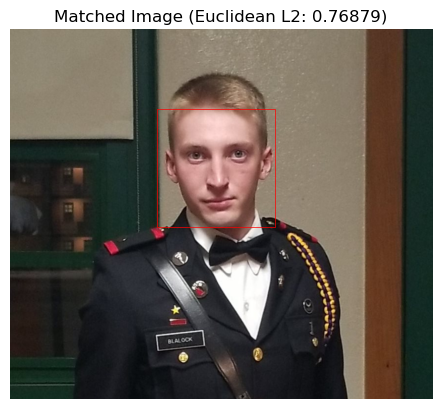

Matched Face Coordinates: x=555, y=207, w=129, h=129


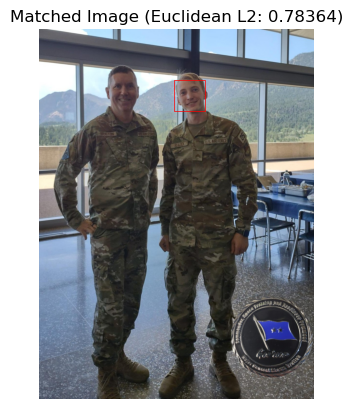

Matched Face Coordinates: x=3365, y=2049, w=54, h=54


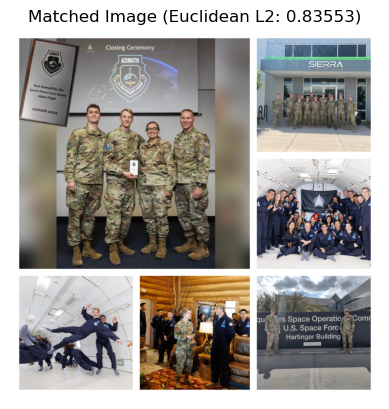

Matched Face Coordinates: x=2509, y=688, w=228, h=228


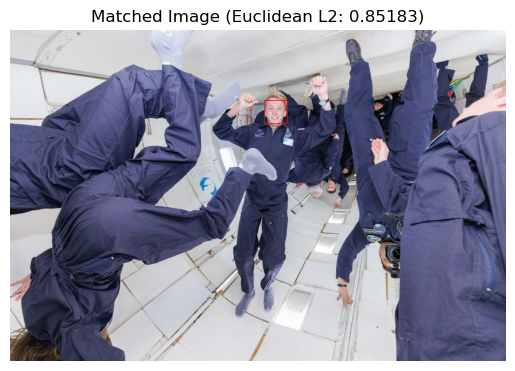

In [284]:
# Call the function to display the faces that matched Thomas

# We choose a threshold based on the maximum Euclidean distance chosen in the database returned from the Find function.
# The higher the distance the less likely the image is a match to Thomas.
threshold = df[0].iloc[:, 5].max()
print("Threshold: ", threshold)

displayMatches(df)

## **Analyze**: 
This function extracts various facial attributes such as age, gender, emotion, and race from a given face image. We will likely not need this function.

In [143]:
# Load a face image
img_path = "source.png"

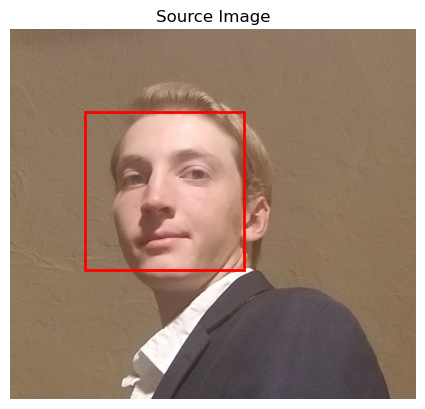

In [144]:
# Plot the source image with a bounding box
fig, ax = plt.subplots(1)
ax.imshow(source_img)
rect = patches.Rectangle((401, 437), 842, 842, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.title("Source Image")
plt.axis("off")
plt.show()

In [147]:
# Analyze the facial attributes of the face image
analysis = DeepFace.analyze(img_path, actions=['age', 'gender', 'emotion', 'race'])
# Get the analysis
analysis = analysis[0]

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.26it/s]


In [153]:
# Print the results
print("Age:", analysis["age"])
print("Gender:", analysis["dominant_gender"])
print("Emotions:", analysis["emotion"])
print("Race:", analysis["race"])

# Apparently Thomas is a scaredy cat in this photo (:

Age: 33
Gender: Man
Emotions: {'angry': 0.062023085774853826, 'disgust': 3.363900589192781e-05, 'fear': 53.559666872024536, 'happy': 7.967367768287659, 'sad': 6.199325248599052, 'surprise': 0.013736820255871862, 'neutral': 32.197850942611694}
Race: {'asian': 1.5400367092688327e-08, 'indian': 5.383076651099827e-07, 'black': 2.4034161813513144e-09, 'white': 99.976247549057, 'middle eastern': 0.011083237768616527, 'latino hispanic': 0.012675067409873009}


# Different Models and Backend Tests

I noticed that with the default model and backend the functions did not perform well on Thomas, missing his shadowy image and side portrait. I will test various models to see which ones work best.

According to ChatGPT, these models and backends will likely work best for shadowy or occluded faces:

*Models*

+ Facenet
+ VGG-Face

*Backends*

+ MTCNN
+ Dlib

In [293]:
# first we will vary the detector_backends

dataPath = "deepface_tutorial_images/representations_vgg_face.pkl"
# remove the stored pkl file
removeFile(dataPath)

# test with new backend with the same model VGG-Face
model_name = "VGG-Face"
detector_backend = "mtcnn"
df = DeepFace.find(img_path=target_img_path, db_path=db_path, enforce_detection = "False", distance_metric = "euclidean_l2",
                   model_name = model_name, detector_backend = detector_backend)
# this a very costly backend, 70.997 seconds for a database with 8 images

File 'deepface_tutorial_images/representations_vgg_face.pkl' has been deleted.


Finding representations:   0%|                                                                   | 0/8 [00:00<?, ?it/s]

1/1 [==============================] - 0s 61ms/step


Finding representations:  12%|███████▍                                                   | 1/8 [00:08<00:59,  8.44s/it]

1/1 [==============================] - 0s 45ms/step


Finding representations:  25%|██████████████▊                                            | 2/8 [00:11<00:30,  5.01s/it]

4/4 [==============================] - 0s 30ms/step


Finding representations:  38%|██████████████████████▏                                    | 3/8 [00:17<00:27,  5.57s/it]

1/1 [==============================] - 0s 50ms/step


Finding representations:  50%|█████████████████████████████▌                             | 4/8 [00:20<00:18,  4.59s/it]

18/18 [==============================] - 1s 29ms/step


Finding representations:  62%|████████████████████████████████████▉                      | 5/8 [00:56<00:48, 16.09s/it]

2/2 [==============================] - 0s 24ms/step


Finding representations:  75%|████████████████████████████████████████████▎              | 6/8 [01:02<00:25, 12.63s/it]

1/1 [==============================] - 0s 46ms/step


Finding representations:  88%|███████████████████████████████████████████████████▋       | 7/8 [01:04<00:09,  9.11s/it]

1/1 [==============================] - 0s 42ms/step


Finding representations: 100%|███████████████████████████████████████████████████████████| 8/8 [01:06<00:00,  8.35s/it]


Representations stored in deepface_tutorial_images/representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
1/1 [==============================] - 0s 40ms/step
find function lasts  70.9973394870758  seconds


Matched Face Coordinates: x=299, y=162, w=241, h=241


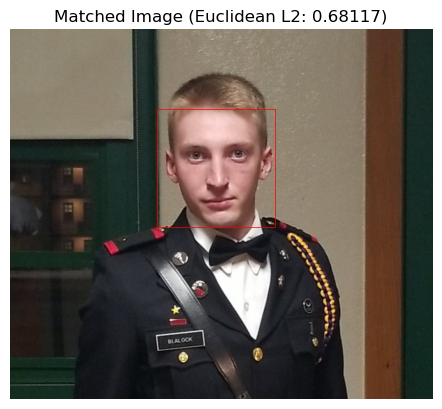

Matched Face Coordinates: x=555, y=207, w=129, h=129


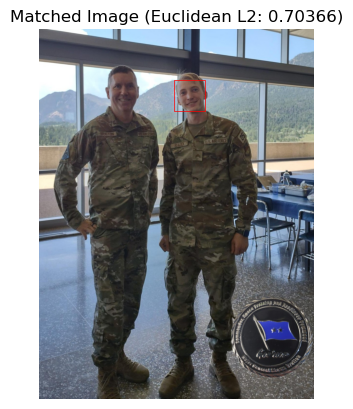

Matched Face Coordinates: x=3365, y=2049, w=54, h=54


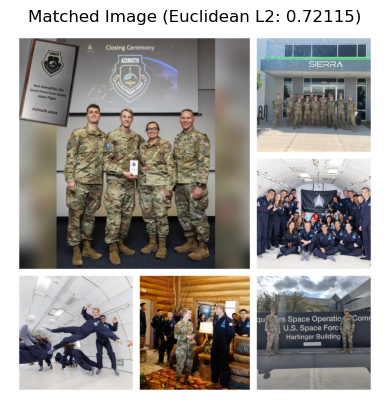

Matched Face Coordinates: x=2509, y=688, w=228, h=228


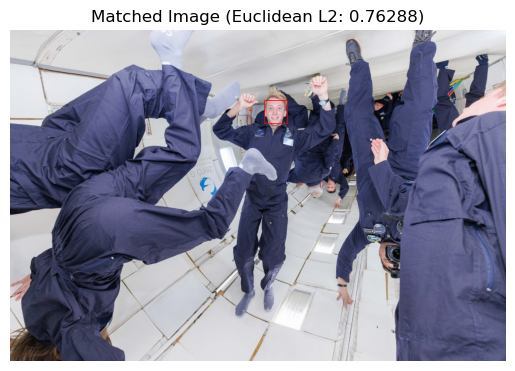

Matched Face Coordinates: x=1477, y=609, w=205, h=205


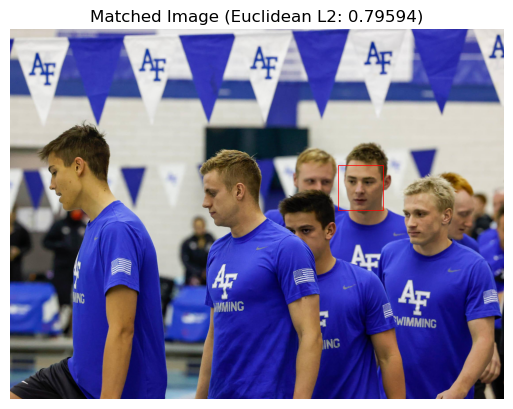

In [294]:
displayMatches(df) # this performed worse and incorrectly matched. mtcnn is NOT viable

File 'deepface_tutorial_images/representations_vgg_face.pkl' has been deleted.


Finding representations: 100%|███████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.83it/s]


Representations stored in deepface_tutorial_images/representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  5.065863132476807  seconds
Matched Face Coordinates: x=299, y=162, w=241, h=241


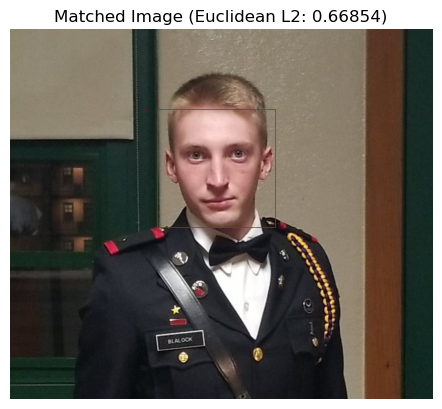

Matched Face Coordinates: x=555, y=207, w=129, h=129


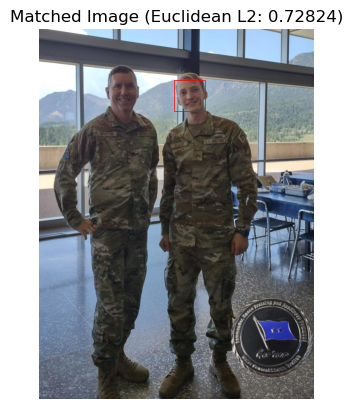

In [292]:
# test ssd backend
detector_backend = "ssd"

# remove the stored pkl file
removeFile(dataPath)

df = DeepFace.find(img_path=target_img_path, db_path=db_path, enforce_detection = "False", distance_metric = "euclidean_l2",
                   model_name = model_name, detector_backend = detector_backend)

displayMatches(df) # this performed worse and only got 2 images. ssd is NOT viable

## Model Tests

File 'deepface_tutorial_images/representations_facenet.pkl' has been deleted.


Finding representations: 100%|███████████████████████████████████████████████████████████| 8/8 [00:35<00:00,  4.49s/it]


Representations stored in deepface_tutorial_images/representations_facenet.pkl file.Please delete this file when you add new identities in your database.
find function lasts  38.887585163116455  seconds
Found 1 matches!

Matched Face Coordinates: x=299, y=162, w=241, h=241


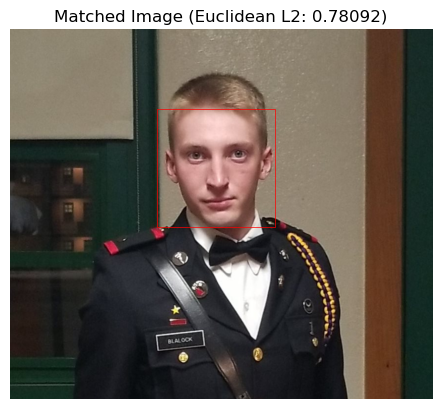

In [305]:
# test models
detector_backend = "retinaface"
model_name = "Facenet"

# remove the stored pkl file
removeFile("deepface_tutorial_images/representations_facenet.pkl")

df = DeepFace.find(img_path=target_img_path, db_path=db_path, enforce_detection = "False", distance_metric = "euclidean_l2",
                   model_name = model_name, detector_backend = detector_backend)

displayMatches(df) # this performed worse and only got 1 image. FaceNet is NOT viable

In [ ]:
detector_backend = "retinaface"
model_name = "VGG-Face"

# remove the stored pkl file
removeFile(dataPath)

df = DeepFace.find(img_path=target_img_path, db_path=db_path, enforce_detection = "False", distance_metric = "euclidean_l2",
                   model_name = model_name, detector_backend = detector_backend)

displayMatches(df) # this performed great, but missed the shadowy and side portrait images.

File 'deepface_tutorial_images/representations_vgg_face.pkl' has been deleted.


Finding representations:  50%|█████████████████████████████▌                             | 4/8 [00:20<00:20,  5.10s/it]

In [ ]:
detector_backend = "retinaface"
model_name = "Dlib"

# remove the stored pkl file
removeFile(dataPath)

df = DeepFace.find(img_path=target_img_path, db_path=db_path, enforce_detection = "False", distance_metric = "euclidean_l2",
                   model_name = model_name, detector_backend = detector_backend)

displayMatches(df) # this performed worse and only got 1 image. FaceNet is NOT viable

## 